In [1]:
import pandas as pd
import numpy as np
from astropy.io import fits
from astropy.table import Table
from glob import glob
import matplotlib.pyplot as plt
import scipy
from math import lgamma
import seaborn as sns
from matplotlib.ticker import MaxNLocator

%matplotlib inline

path = '/Users/chris/Desktop/mastrangelo/'

In [2]:
import matplotlib.pylab as pylab
pylab_params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(pylab_params)

total_stars = 67380

In [3]:
from ast import literal_eval

#https://stackoverflow.com/questions/52232742/how-to-use-ast-literal-eval-in-a-pandas-dataframe-and-handle-exceptions
def literal_eval_w_exceptions(x):
    try:
        return literal_eval(str(x))   
    except Exception as e:
        #print(e)
        pass

Read in files. For each recovery DataFrame per model, calculate the geometric and detected transit multiplicity. For each model, plot the 30 recovery multiplicities over the single ground truth one. There should be one plus (three times two times three) models, or 19 different models. Which models have greater spread? Let's find out!

In [4]:
truth = pd.read_csv(path+'collect_ground_truth.csv', converters=dict(transit_multiplicities=literal_eval))
truth

,ms,bs,cs,fs,transit_multiplicities,geom_transit_multiplicities,intact_fracs,disrupted_fracs,logLs
0,-1.0,0.0,1.000000e+08,0.1,"[203.8, 10.5, 0.0, 0.0, 0.0, 0.0]","[423.20000000000005, 40.800000000000004, 0.0, ...",0.0,0.099999,-904.607382
1,-1.0,0.0,1.000000e+08,0.2,"[407.6, 21.0, 0.0, 0.0, 0.0, 0.0]","[846.4000000000001, 81.60000000000001, 0.0, 0....",0.0,0.199998,-448.634059
2,-1.0,0.0,1.000000e+08,0.3,"[611.4, 31.5, 0.0, 0.0, 0.0, 0.0]","[1269.6, 122.39999999999999, 0.0, 0.0, 0.0, 0.0]",0.0,0.299997,-270.849299
3,-1.0,0.0,1.000000e+08,0.4,"[815.2, 42.0, 0.0, 0.0, 0.0, 0.0]","[1692.8000000000002, 163.20000000000002, 0.0, ...",0.0,0.399996,-206.960735
4,-1.0,0.0,1.000000e+08,0.5,"[1019.0, 52.5, 0.0, 0.0, 0.0, 0.0]","[2116.0, 204.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.499995,-205.480921
...,...,...,...,...,...,...,...,...,...
7915,0.0,1.0,1.000000e+10,0.6,"[1417.2, 686.4, 363.0, 132.6, 39.0, 4.8]","[1567.2, 1042.8, 789.6, 550.1999999999999, 260...",0.6,0.000000,-842.124504
7916,0.0,1.0,1.000000e+10,0.7,"[1653.3999999999999, 800.8, 423.5, 154.7, 45.5...","[1828.3999999999999, 1216.6, 921.1999999999999...",0.7,0.000000,-1124.620057
7917,0.0,1.0,1.000000e+10,0.8,"[1889.6000000000001, 915.2, 484.0, 176.8, 52.0...","[2089.6, 1390.4, 1052.8, 733.6, 347.2000000000...",0.8,0.000000,-1428.250380
7918,0.0,1.0,1.000000e+10,0.9,"[2125.8, 1029.6000000000001, 544.5, 198.9, 58....","[2350.8, 1564.2, 1184.4, 825.3000000000001, 39...",0.9,0.000000,-1748.022769


In [176]:
recovery = pd.read_csv(path+'collect_recovery.csv', converters=dict(transit_multiplicities=literal_eval))
recovery = recovery.loc[~(np.round(recovery.cs, -7) == 1.6e8)] # I had to redo 1.6e8 cutoff time bc of a bug
recovery

,ms,bs,cs,fs,transit_multiplicities,geom_transit_multiplicities,intact_fracs,disrupted_fracs,logLs
0,-1.0,0.0,1.000000e+08,0.1,"[201.70000000000002, 10.600000000000001, 0.0, ...","[421.90000000000003, 41.400000000000006, 0.0, ...",0.0,0.100000,-909.965175
1,-1.0,0.0,1.000000e+08,0.1,"[203.0, 11.8, 0.0, 0.0, 0.0, 0.0]","[425.8, 39.5, 0.0, 0.0, 0.0, 0.0]",0.0,0.100000,-892.742637
2,-1.0,0.0,1.000000e+08,0.1,"[198.8, 12.4, 0.0, 0.0, 0.0, 0.0]","[415.20000000000005, 45.800000000000004, 0.0, ...",0.0,0.099999,-899.911915
3,-1.0,0.0,1.000000e+08,0.1,"[202.3, 12.0, 0.0, 0.0, 0.0, 0.0]","[421.0, 43.7, 0.0, 0.0, 0.0, 0.0]",0.0,0.099998,-892.867861
4,-1.0,0.0,1.000000e+08,0.1,"[210.10000000000002, 10.4, 0.0, 0.0, 0.0, 0.0]","[422.40000000000003, 43.5, 0.0, 0.0, 0.0, 0.0]",0.0,0.100000,-886.729431
...,...,...,...,...,...,...,...,...,...
237595,0.0,1.0,1.000000e+10,1.0,"[2392.0, 1183.0, 546.0, 232.0, 54.0, 9.0]","[2715.0, 1788.0, 1248.0, 883.0, 428.0, 79.0]",1.0,0.000000,-2080.620364
237596,0.0,1.0,1.000000e+10,1.0,"[2479.0, 1194.0, 563.0, 249.0, 54.0, 6.0]","[2728.0, 1743.0, 1340.0, 969.0, 440.0, 89.0]",1.0,0.000000,-2176.395026
237597,0.0,1.0,1.000000e+10,1.0,"[2454.0, 1193.0, 575.0, 267.0, 58.0, 14.0]","[2719.0, 1792.0, 1347.0, 927.0, 458.0, 116.0]",1.0,0.000000,-2198.744845
237598,0.0,1.0,1.000000e+10,1.0,"[2403.0, 1223.0, 597.0, 233.0, 55.0, 10.0]","[2742.0, 1788.0, 1330.0, 904.0, 426.0, 105.0]",1.0,0.000000,-2173.792930


In [177]:
recovery_redo = pd.read_csv(path+'collect_recovery_redo.csv', converters=dict(transit_multiplicities=literal_eval))

In [181]:
recovery = pd.concat([recovery, recovery_redo])

Plot posteriors. The recovery file serves two purposes: 1) injection-recovery, in order to evaluate our machinery's validatity for ground truths that span different corners of our sculpting law parameter space; and 2) just straight up using the logLs in order to forward model the best sculpting law, given the observed Kepler transit multiplicity. The injection-recovery notebook (https://github.com/exoclam/mastrangelo/blob/main/notebooks/injection-recovery.ipynb) deals with 1). Here, we do 2). 

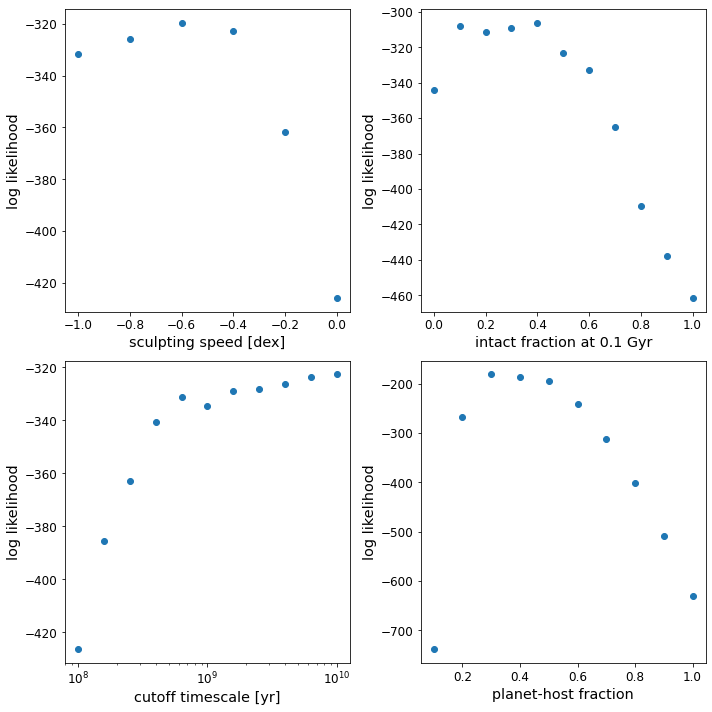

In [182]:
cube = [0, 0, 0]
fs = np.round(np.linspace(0.1, 1., 10), 1)
ndim = 3
nparams = 3

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

# marginalize in 1D
marginalized_logLs = []
for gi_m in np.sort(recovery.ms.unique()):
    
    # subset
    only = recovery.loc[(recovery.ms == gi_m)]# & (model_logLs.f == 0.3)]
    
    # marginalize logL
    marginalized_logLs.append(np.median(only.logLs))

ax1.scatter(np.sort(recovery.ms.unique()), marginalized_logLs)
ax1.set_ylabel("log likelihood")
ax1.set_xlabel("sculpting speed [dex]")

marginalized_logLs = []
for gi_b in np.sort(recovery.bs.unique()):
        
    # subset
    only = recovery.loc[(recovery.bs == gi_b)]# & (model_logLs.f == 0.3)]
    
    # marginalize logL
    marginalized_logLs.append(np.median(only.logLs))
ax2.scatter(np.sort(recovery.bs.unique()), marginalized_logLs)
ax2.set_ylabel("log likelihood")
ax2.set_xlabel("intact fraction at 0.1 Gyr")

marginalized_logLs = []
for gi_c in np.sort(recovery.cs.unique()):
    
    # subset
    only = recovery.loc[(recovery.cs == gi_c)]# & (model_logLs.f == 0.3)]
    
    # marginalize logL
    marginalized_logLs.append(np.median(only.logLs))
ax3.scatter(np.sort(recovery.cs.unique()), marginalized_logLs)
ax3.set_ylabel("log likelihood")
ax3.set_xlabel("cutoff timescale [yr]")
ax3.set_xscale('log')

marginalized_logLs = []
for gi_f in np.linspace(0.1, 1, 10):
    
    # subset
    only = recovery.loc[(np.round(recovery.fs, 1) == np.round(gi_f, 1))]
    
    # marginalize logL
    marginalized_logLs.append(np.median(only.logLs))
ax4.scatter(np.linspace(0.1, 1, 10), marginalized_logLs)
ax4.set_ylabel("log likelihood")
ax4.set_xlabel("planet-host fraction")

plt.tight_layout()
plt.show()

In [183]:
np.linspace(0.1, 1, 10), marginalized_logLs

f_vs_logL_df = pd.DataFrame({'fs': fs, 'logLs': marginalized_logLs})
print(f_vs_logL_df.loc[f_vs_logL_df.logLs==max(marginalized_logLs)])
print(f_vs_logL_df.logLs.quantile(0.32))
print(f_vs_logL_df.loc[f_vs_logL_df.logLs>=f_vs_logL_df.logLs.quantile(0.32)])
print(f_vs_logL_df.loc[f_vs_logL_df.logLs>=f_vs_logL_df.logLs.quantile(0.32)].logLs.max())

    fs       logLs
2  0.3 -181.273828
-415.1898833685766
    fs       logLs
1  0.2 -266.700171
2  0.3 -181.273828
3  0.4 -185.722761
4  0.5 -195.473460
5  0.6 -240.691217
6  0.7 -312.044422
7  0.8 -402.318470
-181.2738283333444


Unlike in the injection-recovery tests, the real ground truth appears to weakly favor long-lived sculpting at fast to moderate speeds and initial intact fractions of less than 0.6. Perhaps the 2D posteriors will shed more light.

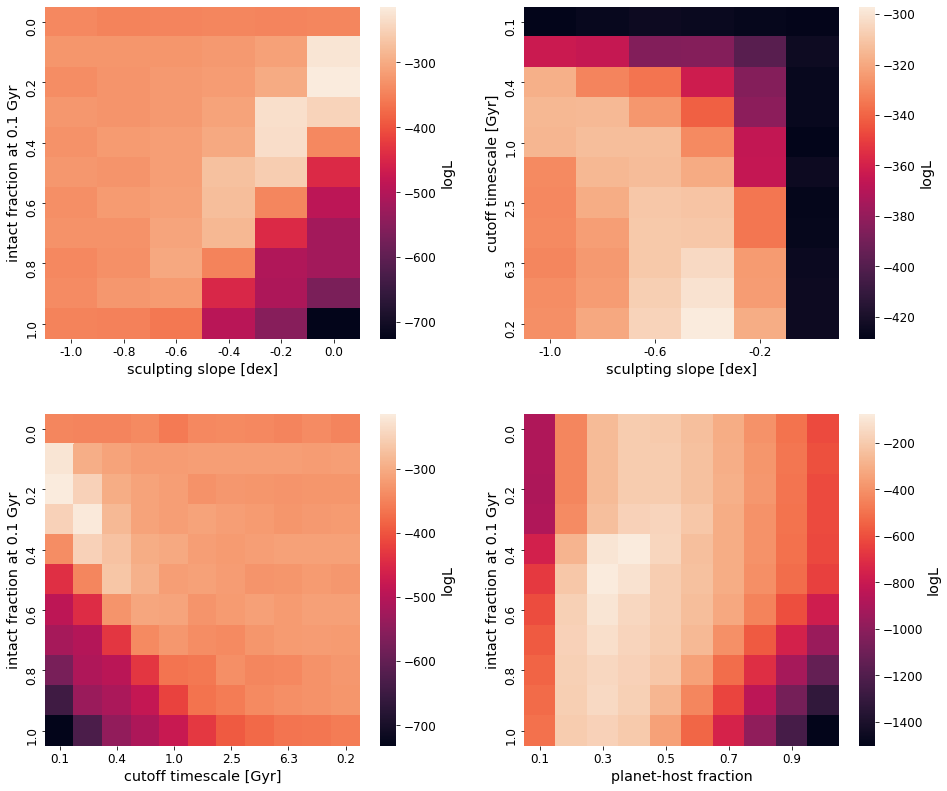

In [184]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 12))
f.tight_layout(pad=5.)

### 1
piv = recovery.groupby(['ms','bs']).median('logLs').reset_index()
piv = piv.pivot("bs","ms","logLs") # vs logged_normalized_likelihood

sns.heatmap(piv, yticklabels=recovery.bs.unique().round(1), xticklabels=recovery.ms.unique().round(1), 
            cbar_kws={'label': 'logL'}, ax=ax1)
ax1.set_yticks(ax1.get_yticks()[::2]) # sample every other tick, for cleanness
ax1.set(ylabel='intact fraction at 0.1 Gyr')
ax1.set(xlabel='sculpting slope [dex]')

### 2
piv = recovery.groupby(['ms','cs']).median('logLs').reset_index()
piv = piv.pivot("cs","ms","logLs") # vs logged_normalized_likelihood

sns.heatmap(piv, yticklabels=np.round(recovery.cs.unique()/1e9,1), xticklabels=recovery.ms.unique().round(1), 
            cbar_kws={'label': 'logL'}, ax=ax2)
ax2.set_yticks(ax2.get_yticks()[::2]) # sample every other tick, for cleanness
ax2.set_xticks(ax2.get_xticks()[::2]) # sample every other tick, for cleanness
ax2.set(ylabel='cutoff timescale [Gyr]')
ax2.set(xlabel='sculpting slope [dex]')
#ax2.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
#ax2.yaxis.set_major_formatter(tick.FormatStrFormatter('%2.2e'))

### 3
piv = recovery.groupby(['cs','bs']).median('logLs').reset_index()
piv = piv.pivot("bs","cs","logLs") # vs logged_normalized_likelihood

sns.heatmap(piv, yticklabels=np.round(recovery.bs.unique(),1), xticklabels=np.round(recovery.cs.unique()/1e9,1), 
            cbar_kws={'label': 'logL'}, ax=ax3)
ax3.set_yticks(ax3.get_yticks()[::2]) # sample every other tick, for cleanness
ax3.set_xticks(ax3.get_xticks()[::2]) # sample every other tick, for cleanness
ax3.set(xlabel='cutoff timescale [Gyr]')
ax3.set(ylabel='intact fraction at 0.1 Gyr')
#ax2.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
#ax2.yaxis.set_major_formatter(tick.FormatStrFormatter('%2.2e'))


### 4
piv = recovery.groupby(['fs','bs']).median('logLs').reset_index()
piv = piv.pivot("bs","fs","logLs") # vs logged_normalized_likelihood

sns.heatmap(piv, yticklabels=np.round(recovery.bs.unique(),1), xticklabels=np.round(recovery.fs.unique(),1), 
            cbar_kws={'label': 'logL'}, ax=ax4)
ax4.set_yticks(ax4.get_yticks()[::2]) # sample every other tick, for cleanness
ax4.set_xticks(ax4.get_xticks()[::2]) # sample every other tick, for cleanness
ax4.set(xlabel='planet-host fraction')
ax4.set(ylabel='intact fraction at 0.1 Gyr')
#ax2.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
#ax2.yaxis.set_major_formatter(tick.FormatStrFormatter('%2.2e'))

plt.savefig(path+'figures/2d-posteriors.png', facecolor='white', bbox_inches='tight')
plt.show()

These 2D posteriors show that the most favored combination of b and c are "short-lived" dynamical sculpting of systems that are already carved up into disrupted systems by 0.1 Gyr (third subplot). At the same time, we find as well that a moderate sculpting law slope of -0.4 for 10 Gyr is favored (second subplot). These two scenarios underpin a strip of favored models that runs diagonally from moderate sculpting off of a moderate initial intact fraction, to no sculpting off of an initially low intact fraction (first subplot). 

Now, all models are not built the same because 1) as evidenced by the uniformly shaded column for no sculpting as a function of cutoff time, some models are nonsensical (eg. models whose cutoffs come after the first half of the piecewise function already decays to zero; varying cutoff times for non-sculpting models). Also, 2) the age distributino of our stellar sample is such that different amounts of the sample are affected by different models. For example, a model with cutoff time at 1 Gyr is going to be a functional no-sculpting model for most stars. 

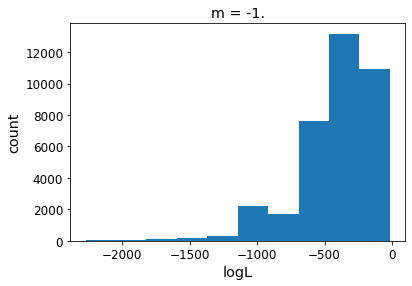

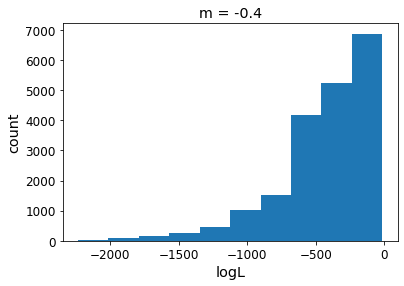

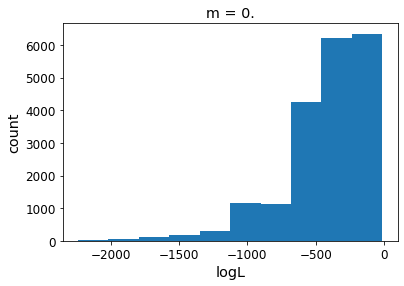

In [185]:
#print(recovery.loc[(recovery.cs == np.round(np.sort(recovery.cs.unique())[0], 0))].head())
plt.hist(recovery.loc[(recovery.ms == np.round(np.sort(recovery.ms.unique())[0], 0))].logLs)
#plt.title('c = 1e8 yrs')
plt.title('m = -1.')
plt.xlabel('logL')
plt.ylabel('count')
plt.show()

#print(recovery.loc[(np.round(recovery.cs,0) == np.round(np.sort(recovery.cs.unique())[1], 0))].head())
plt.hist(recovery.loc[(np.round(recovery.cs,0) == np.round(np.sort(recovery.cs.unique())[3], 0))].logLs)
#plt.title('c = 158489319 yrs')
plt.title('m = -0.4')
plt.xlabel('logL')
plt.ylabel('count')
plt.show()

#print(recovery.loc[(np.round(recovery.cs,0) == np.round(np.sort(recovery.cs.unique())[2], 0))].head())
plt.hist(recovery.loc[(np.round(recovery.cs,0) == np.round(np.sort(recovery.cs.unique())[5], 0))].logLs)
#plt.title('c = 251188643 yrs')
plt.title('m = 0.')
plt.xlabel('logL')
plt.ylabel('count')
plt.show()


In [33]:
# calculate delta_logL
spreads = []
for gi_m in np.sort(recovery.ms.unique()):
    for gi_b in np.sort(recovery.bs.unique()):
        for gi_c in np.sort(recovery.cs.unique()):
            for f in np.round(np.linspace(0.1, 1, 10),1):
                models = recovery.loc[(np.round(recovery.ms,1)==np.round(gi_m,1))&(np.round(recovery.bs,1)==np.round(gi_b,1))&(np.round(recovery.cs,0)==np.round(gi_c,0))&(np.round(recovery.fs,1)==f)]
                spreads.append(np.std(models.logLs))                             

In [186]:
best_logL = max(recovery.loc[recovery.logLs < 0.].logLs)
print("Best model: ", recovery.loc[recovery.logLs == best_logL])

# delta logL is the median spread of logLs across all models
delta_logL = np.median(spreads)
delta_logL = 10.

good_models = recovery.loc[np.abs(recovery.logLs - best_logL) <= delta_logL]
print("Some models between best model and ground truth: ")
print(good_models)

Best model:           ms   bs            cs   fs  \
150692 -0.4  0.8  6.309573e+09  0.4   

                                   transit_multiplicities  \
150692  [831.2, 135.6, 38.800000000000004, 15.60000000...   

                    geom_transit_multiplicities  intact_fracs  \
150692  [1585.2, 273.6, 113.2, 55.6, 35.2, 6.0]      0.173239   

        disrupted_fracs      logLs  
150692         0.226761 -14.528591  
Some models between best model and ground truth: 
        ms   bs            cs   fs  \
3716  -1.0  0.1  1.000000e+08  0.4   
7290  -1.0  0.2  1.000000e+08  0.4   
7291  -1.0  0.2  1.000000e+08  0.4   
7292  -1.0  0.2  1.000000e+08  0.4   
7293  -1.0  0.2  1.000000e+08  0.4   
...    ...  ...           ...  ...   
17195  0.0  0.2  1.584893e+08  0.4   
17196  0.0  0.2  1.584893e+08  0.4   
17197  0.0  0.2  1.584893e+08  0.4   
17198  0.0  0.2  1.584893e+08  0.4   
17199  0.0  0.2  1.584893e+08  0.4   

                                  transit_multiplicities  \
3716   [827.6

Plot good models, where "good" is defined as being within a typical logL spread of the best-logL model. 

In [132]:
def build_models(x, m, b, c, f): # adapted from Ballard et al in prep, log version
    """ 
    Calculate P(intact) as a function of time, in order to visualize sculpting models.

    Input:
    - x: grid of ages [log yrs]
    - m: sculpting law slope [dex]
    - b: sculpting law initial intact probability, out of planet-hosting stars
    - c: sculpting law turnoff time [log yrs]
    - f: fraction of planet-hosting stars

    Output:
    - y: grid of P(intacts)

    """

    # x-axis before cutoff
    x1 = x[x<c]
    x2 = x[x>=c]
    
    # first piece, before cutoff
    y1 = (b + m * (np.log10(x1) - 8)) * f
    
    # second piece, after cutoff
    y2 = np.ones(len(x2)) * (b + m * (np.log10(c) - 8)) * f
    
    y = np.concatenate((y1, y2))
    
    # flatten out at zero
    y = np.where(y < 0, 0, y)
    
    return y

-0.8 0.6000000000000001 251188643.1509582 0.4
-0.8 0.9 630957344.4801942 0.4
-0.6 0.5 251188643.1509582 0.4
-0.3999999999999999 0.5 398107170.5534969 0.4
-0.2 0.5 1584893192.4611108 0.4
-0.2 0.30000000000000004 158489319.2461111 0.4


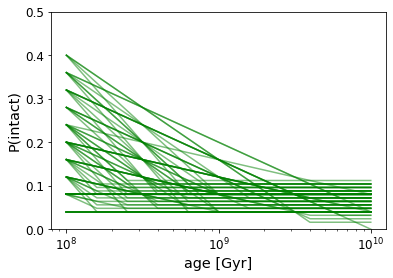

In [204]:
x = np.logspace(8, 10, 1000)

### best model
#best_model = model_logLs.loc[(model_logLs.logL >= best_logL) & (model_logLs.logL < 0.)]
#m, b, c, f = best_model.m.to_list()[0], best_model.b.to_list()[0], best_model.c.to_list()[0], best_model.f.to_list()[0]
#plt.plot(x, build_models(x, m, b, c, f), label='best fit', color='k')

### models as good as or better than ground truth
good_models_deduped = good_models.drop_duplicates(subset=['ms','bs','cs','fs'])
label_flag = True
for index, row in good_models_deduped.reset_index().iterrows(): 
    m, b, c, f = row.ms, row.bs, row.cs, row.fs
    if label_flag == True:
        plt.plot(x, build_models(x, m, b, c, f), color='green', zorder=0, label='good models', alpha=0.5)
    elif label_flag == False:
        plt.plot(x, build_models(x, m, b, c, f), color='green', zorder=0, alpha=0.5)
    label_flag = False  
    
    if build_models(x, m, b, c, f)[-1] > 0.1:
        print(m, b, c, f)
    
plt.xscale('log')
plt.ylim([0, 0.5])
plt.xlabel('age [Gyr]')
plt.ylabel('P(intact)')
plt.savefig(path+'figures/good-models.png', facecolor='white', bbox_inches='tight')

plt.show()

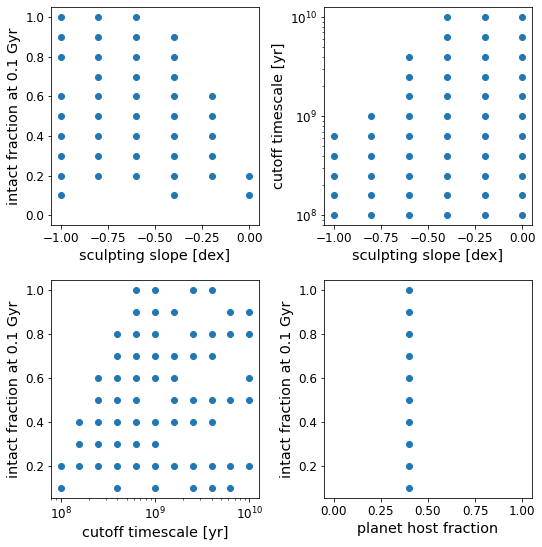

In [194]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
f.tight_layout(pad=3.)

good_models_m_b = good_models.drop_duplicates(subset=['ms','bs'])
ax1.scatter(good_models_m_b.ms, good_models_m_b.bs)
ax1.set_xlabel('sculpting slope [dex]')
ax1.set_ylabel('intact fraction at 0.1 Gyr')
ax1.set_xlim([-1.05, 0.05])
ax1.set_ylim([-0.05, 1.05])

good_models_m_c = good_models.drop_duplicates(subset=['ms','cs'])
ax2.scatter(good_models_m_c.ms, good_models_m_c.cs)
ax2.set_xlabel('sculpting slope [dex]')
ax2.set_ylabel('cutoff timescale [yr]')
ax2.set_xlim([-1.05, 0.05])
ax2.set_yscale('log')

good_models_c_b = good_models.drop_duplicates(subset=['cs','bs'])
ax3.scatter(good_models_c_b.cs, good_models_c_b.bs)
ax3.set_xlabel('cutoff timescale [yr]')
ax3.set_ylabel('intact fraction at 0.1 Gyr')
#ax3.set_xlim([-1.05, 0.05])
ax3.set_xscale('log')

good_models_f_b = good_models.drop_duplicates(subset=['fs','bs'])
ax4.scatter(good_models_f_b.fs, good_models_f_b.bs)
ax4.set_xlabel('planet host fraction')
ax4.set_ylabel('intact fraction at 0.1 Gyr')
ax4.set_xlim([-0.05, 1.05])

plt.savefig(path+'figures/good-models-2d.png', facecolor='white', bbox_inches='tight')
plt.show()

(array([30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 30.]),
 array([0.17348284, 0.18656354, 0.19964424, 0.21272494, 0.22580563,
        0.23888633, 0.25196703, 0.26504773, 0.27812843, 0.29120913,
        0.30428983]),
 <BarContainer object of 10 artists>)

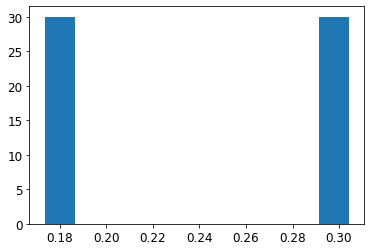

In [168]:
plt.hist(good_weird3.intact_fracs)

In [166]:
good_weird3

,ms,bs,cs,fs,transit_multiplicities,geom_transit_multiplicities,intact_fracs,disrupted_fracs,logLs
176880,-0.2,0.5,1.584893e+08,0.4,"[867.6, 234.8, 97.2, 45.6, 14.0, 0.4]","[1368.0, 426.0, 226.8, 172.4, 77.2, 13.2000000...",0.303287,0.096713,-82.433258
176881,-0.2,0.5,1.584893e+08,0.4,"[874.8000000000001, 248.4, 112.80000000000001,...","[1395.6000000000001, 423.20000000000005, 243.6...",0.303505,0.096495,-97.181320
176882,-0.2,0.5,1.584893e+08,0.4,"[878.4000000000001, 119.60000000000001, 42.400...","[1577.2, 268.8, 99.2, 71.2, 34.4, 9.6000000000...",0.175394,0.224606,-18.065388
176883,-0.2,0.5,1.584893e+08,0.4,"[913.2, 256.8, 107.2, 46.400000000000006, 10.8...","[1422.4, 434.40000000000003, 267.6, 162.0, 75....",0.302591,0.097409,-100.677556
176884,-0.2,0.5,1.584893e+08,0.4,"[849.6, 125.2, 45.2, 15.200000000000001, 5.2, ...","[1592.0, 255.60000000000002, 100.4, 71.6000000...",0.174657,0.225343,-17.086084
176885,-0.2,0.5,1.584893e+08,0.4,"[863.6, 251.20000000000002, 108.4, 43.6, 12.4,...","[1383.6000000000001, 424.8, 243.20000000000002...",0.303291,0.096709,-96.770944
176886,-0.2,0.5,1.584893e+08,0.4,"[916.4000000000001, 234.8, 106.4, 49.2, 12.0, ...","[1432.8000000000002, 396.40000000000003, 240.4...",0.302853,0.097147,-93.844129
176887,-0.2,0.5,1.584893e+08,0.4,"[832.4000000000001, 130.4, 42.0, 15.2000000000...","[1581.6000000000001, 246.4, 99.2, 64.8, 31.6, ...",0.174563,0.225437,-15.298910
176888,-0.2,0.5,1.584893e+08,0.4,"[892.8000000000001, 239.60000000000002, 103.2,...","[1448.4, 405.6, 238.0, 159.60000000000002, 85....",0.303090,0.096910,-87.389070
176889,-0.2,0.5,1.584893e+08,0.4,"[789.6, 124.0, 38.800000000000004, 17.2, 4.4, ...","[1532.4, 248.8, 108.0, 59.6, 32.4, 9.200000000...",0.176084,0.223916,-17.367627


60 60 60


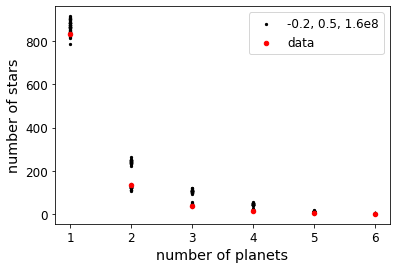

In [169]:
good_weird1 = recovery.loc[(np.round(recovery.ms,1) == -0.4) & (np.round(recovery.bs,1) == 0.8) & (np.round(recovery.cs, -7) == 1.6e8) & (np.round(recovery.fs,1) == 0.4)]
good_weird2 = recovery.loc[(np.round(recovery.ms,1) == -0.4) & (np.round(recovery.bs,1) == 0.9) & (np.round(recovery.cs, -7) == 1.6e8) & (np.round(recovery.fs,1) == 0.4)]
good_weird3 = recovery.loc[(np.round(recovery.ms,1) == -0.2) & (np.round(recovery.bs,1) == 0.5) & (np.round(recovery.cs, -7) == 1.6e8) & (np.round(recovery.fs,1) == 0.4)]
print(len(good_weird1), len(good_weird2), len(good_weird3))

k = pd.Series([833, 134, 38, 15, 5, 0])

plt.scatter(np.arange(7)[1:], good_weird3.iloc[0].transit_multiplicities, color='k', s=5, label='-0.2, 0.5, 1.6e8')

for i in range(len(good_weird1.iloc[1:])):
    plt.scatter(np.arange(7)[1:], good_weird3.iloc[i].transit_multiplicities, color='k', s=5)
    #print(better_loglike(good_weird1.iloc[i].transit_multiplicities, k))
    
plt.scatter(np.arange(7)[1:], k, color='r', s=20, label='data')
plt.xlabel('number of planets')
plt.ylabel('number of stars')
plt.legend()
#plt.savefig(path+'figures/good-yields.png', facecolor='white', bbox_inches='tight')
plt.show()

Which models have 60 instead of 30 samples, and are they simiarly bifurcated in intact fraction? 

In [165]:
for gi_m in np.sort(recovery.ms.unique()):
    for gi_b in np.sort(recovery.bs.unique()):
        for gi_c in np.sort(recovery.cs.unique()):
            for f in np.round(np.linspace(0.1, 1, 10),1):
                models = recovery.loc[(np.round(recovery.ms,1)==np.round(gi_m,1))&(np.round(recovery.bs,1)==np.round(gi_b,1))&(np.round(recovery.cs,0)==np.round(gi_c,0))&(np.round(recovery.fs,1)==f)]
                if len(models) > 30:
                    print(models.iloc[0].ms, models.iloc[0].bs, models.iloc[0].cs, models.iloc[0].fs, len(models))
                    


-1.0 0.0 158489319.2461111 0.1 60
-1.0 0.0 158489319.2461111 0.2 60
-1.0 0.0 158489319.2461111 0.3 60
-1.0 0.0 158489319.2461111 0.4 60
-1.0 0.0 158489319.2461111 0.5 60
-1.0 0.0 158489319.2461111 0.6 60
-1.0 0.0 158489319.2461111 0.7 60
-1.0 0.0 158489319.2461111 0.8 60
-1.0 0.0 158489319.2461111 0.9 60
-1.0 0.0 158489319.2461111 1.0 60
-1.0 0.1 158489319.2461111 0.1 60
-1.0 0.1 158489319.2461111 0.2 60
-1.0 0.1 158489319.2461111 0.3 60
-1.0 0.1 158489319.2461111 0.4 60
-1.0 0.1 158489319.2461111 0.5 60
-1.0 0.1 158489319.2461111 0.6 60
-1.0 0.1 158489319.2461111 0.7 60
-1.0 0.1 158489319.2461111 0.8 60
-1.0 0.1 158489319.2461111 0.9 60
-1.0 0.1 158489319.2461111 1.0 60
-1.0 0.2 158489319.2461111 0.1 60
-1.0 0.2 158489319.2461111 0.2 60
-1.0 0.2 158489319.2461111 0.3 60
-1.0 0.2 158489319.2461111 0.4 60
-1.0 0.2 158489319.2461111 0.5 60
-1.0 0.2 158489319.2461111 0.6 60
-1.0 0.2 158489319.2461111 0.7 60
-1.0 0.2 158489319.2461111 0.8 60
-1.0 0.2 158489319.2461111 0.9 60
-1.0 0.2 15848

-0.6 0.0 158489319.2461111 0.1 60
-0.6 0.0 158489319.2461111 0.2 60
-0.6 0.0 158489319.2461111 0.3 60
-0.6 0.0 158489319.2461111 0.4 60
-0.6 0.0 158489319.2461111 0.5 60
-0.6 0.0 158489319.2461111 0.6 60
-0.6 0.0 158489319.2461111 0.7 60
-0.6 0.0 158489319.2461111 0.8 60
-0.6 0.0 158489319.2461111 0.9 60
-0.6 0.0 158489319.2461111 1.0 60
-0.6 0.1 158489319.2461111 0.1 60
-0.6 0.1 158489319.2461111 0.2 60
-0.6 0.1 158489319.2461111 0.3 60
-0.6 0.1 158489319.2461111 0.4 60
-0.6 0.1 158489319.2461111 0.5 60
-0.6 0.1 158489319.2461111 0.6 60
-0.6 0.1 158489319.2461111 0.7 60
-0.6 0.1 158489319.2461111 0.8 60
-0.6 0.1 158489319.2461111 0.9 60
-0.6 0.1 158489319.2461111 1.0 60
-0.6 0.2 158489319.2461111 0.1 60
-0.6 0.2 158489319.2461111 0.2 60
-0.6 0.2 158489319.2461111 0.3 60
-0.6 0.2 158489319.2461111 0.4 60
-0.6 0.2 158489319.2461111 0.5 60
-0.6 0.2 158489319.2461111 0.6 60
-0.6 0.2 158489319.2461111 0.7 60
-0.6 0.2 158489319.2461111 0.8 60
-0.6 0.2 158489319.2461111 0.9 60
-0.6 0.2 15848

-0.3999999999999999 0.8 158489319.2461111 0.1 60
-0.3999999999999999 0.8 158489319.2461111 0.2 60
-0.3999999999999999 0.8 158489319.2461111 0.3 60
-0.3999999999999999 0.8 158489319.2461111 0.4 60
-0.3999999999999999 0.8 158489319.2461111 0.5 60
-0.3999999999999999 0.8 158489319.2461111 0.6 60
-0.3999999999999999 0.8 158489319.2461111 0.7 60
-0.3999999999999999 0.8 158489319.2461111 0.8 60
-0.3999999999999999 0.8 158489319.2461111 0.9 60
-0.3999999999999999 0.8 158489319.2461111 1.0 60
-0.3999999999999999 0.9 158489319.2461111 0.1 60
-0.3999999999999999 0.9 158489319.2461111 0.2 60
-0.3999999999999999 0.9 158489319.2461111 0.3 60
-0.3999999999999999 0.9 158489319.2461111 0.4 60
-0.3999999999999999 0.9 158489319.2461111 0.5 60
-0.3999999999999999 0.9 158489319.2461111 0.6 60
-0.3999999999999999 0.9 158489319.2461111 0.7 60
-0.3999999999999999 0.9 158489319.2461111 0.8 60
-0.3999999999999999 0.9 158489319.2461111 0.9 60
-0.3999999999999999 0.9 158489319.2461111 1.0 60
-0.3999999999999999 

0.0 0.7000000000000001 158489319.2461111 0.1 60
0.0 0.7000000000000001 158489319.2461111 0.2 60
0.0 0.7000000000000001 158489319.2461111 0.3 60
0.0 0.7000000000000001 158489319.2461111 0.4 60
0.0 0.7000000000000001 158489319.2461111 0.5 60
0.0 0.7000000000000001 158489319.2461111 0.6 60
0.0 0.7000000000000001 158489319.2461111 0.7 60
0.0 0.7000000000000001 158489319.2461111 0.8 60
0.0 0.7000000000000001 158489319.2461111 0.9 60
0.0 0.7000000000000001 158489319.2461111 1.0 60
0.0 0.8 158489319.2461111 0.1 60
0.0 0.8 158489319.2461111 0.2 60
0.0 0.8 158489319.2461111 0.3 60
0.0 0.8 158489319.2461111 0.4 60
0.0 0.8 158489319.2461111 0.5 60
0.0 0.8 158489319.2461111 0.6 60
0.0 0.8 158489319.2461111 0.7 60
0.0 0.8 158489319.2461111 0.8 60
0.0 0.8 158489319.2461111 0.9 60
0.0 0.8 158489319.2461111 1.0 60
0.0 0.9 158489319.2461111 0.1 60
0.0 0.9 158489319.2461111 0.2 60
0.0 0.9 158489319.2461111 0.3 60
0.0 0.9 158489319.2461111 0.4 60
0.0 0.9 158489319.2461111 0.5 60
0.0 0.9 158489319.2461111

In [134]:
len(good_models_deduped)/(6*11*11*10)

0.008953168044077135

So about 3% of models are "good" models

Let's plot these model yields, compared to the real ground truth transit yield.

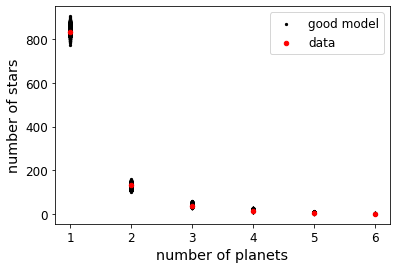

In [135]:
k = pd.Series([833, 134, 38, 15, 5, 0])

plt.scatter(np.arange(7)[1:], good_models.iloc[0].transit_multiplicities, color='k', s=5, label='good model')

for i in range(len(good_models.iloc[1:])):
    plt.scatter(np.arange(7)[1:], good_models.iloc[i].transit_multiplicities, color='k', s=5)
    
plt.scatter(np.arange(7)[1:], k, color='r', s=20, label='data')
plt.xlabel('number of planets')
plt.ylabel('number of stars')
plt.legend()
plt.savefig(path+'figures/good-yields.png', facecolor='white', bbox_inches='tight')
plt.show()

Now let's plot the other two key plots involved in the paper: intact fraction as a function of logL, and the f_hot vs f_cold heatmap.

First, we need to find out what the 68th percentile intact fraction is, to give an upper bound on the present-day intact fraction among Kepler-like stars. Note that this is the intact fraction over all stars, not just planet hosts. 

In [105]:
intact_v_logL_df = pd.DataFrame({'intact_fracs': median_intact_fracs, 'logLs': median_logLs})
print(intact_v_logL_df.loc[intact_v_logL_df.logLs==max(median_logLs)])
print(median_logLs.quantile(0.32))
print(intact_v_logL_df.loc[intact_v_logL_df.logLs>=median_logLs.quantile(0.32)])
print(intact_v_logL_df.loc[intact_v_logL_df.logLs>=median_logLs.quantile(0.32)].intact_fracs.max())

                          intact_fracs      logLs
ms   bs  cs          fs                          
-0.6 0.2 100000000.0 0.4       0.19121 -16.618432
-495.4910171533474
                           intact_fracs       logLs
ms   bs  cs           fs                           
-1.0 0.0 1.000000e+08 0.2           0.0 -436.366669
                      0.3           0.0 -258.598361
                      0.4           0.0 -194.257482
                      0.5           0.0 -195.861216
                      0.6           0.0 -233.706419
...                                 ...         ...
 0.0 1.0 6.309573e+09 0.4           0.4 -386.416475
         1.000000e+10 0.1           0.1 -463.646347
                      0.2           0.2 -201.346774
                      0.3           0.3 -239.204357
                      0.4           0.4 -392.013613

[4937 rows x 2 columns]
0.5327629088865347


In [203]:
good_models.intact_fracs.min()

0.11450905101481075

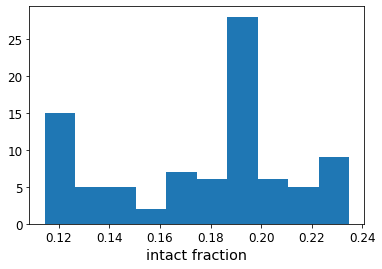

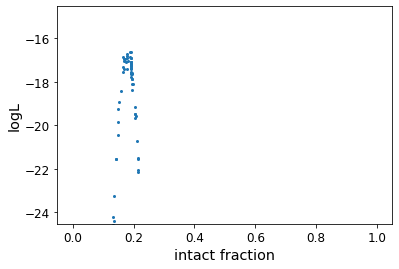

In [201]:
# quick check of the intact fraction distribution of good models (take median across all samples of each tuple)
plt.hist(good_models.groupby(['ms','bs','cs','fs']).median('intact_fracs').intact_fracs)
plt.xlabel('intact fraction')
plt.show()

median_logLs = recovery.groupby(['ms','bs','cs','fs']).median('logLs').logLs
median_intact_fracs = recovery.groupby(['ms','bs','cs','fs']).median('intact_fracs').intact_fracs
plt.scatter(median_intact_fracs, median_logLs, s=4)
#plt.vlines(x=0.53, ymin=min(median_logLs), ymax=max(median_logLs), linestyles='--', color='r', label=r'1-$\sigma$')
plt.xlabel('intact fraction')
plt.ylabel('logL')
plt.ylim([good_models.logLs.max() - 10, good_models.logLs.max()])
#plt.legend()
plt.savefig(path+'figures/intact-vs-logL.png', facecolor='white', bbox_inches='tight')
plt.show()

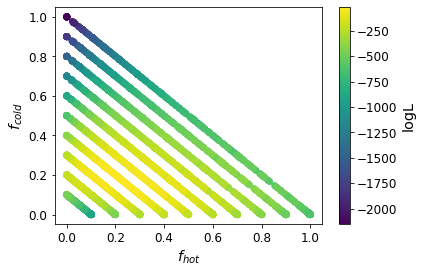

In [87]:
# f_hot vs f_cold
deduped_intacts = recovery.groupby(['ms','bs','cs','fs']).median('intact_fracs').intact_fracs
deduped_disrupted = recovery.groupby(['ms','bs','cs','fs']).median('disrupted_fracs').disrupted_fracs
deduped_logLs = recovery.groupby(['ms','bs','cs','fs']).median('logLs').logLs

im = plt.scatter(deduped_disrupted, deduped_intacts, c=deduped_logLs)
plt.colorbar(im, label='logL')

plt.xlabel(r'$f_{hot}$')
plt.ylabel(r'$f_{cold}$')
plt.savefig(path+'figures/f_hot-vs-f_cold.png', facecolor='white', bbox_inches='tight')
plt.show()

Finally, let's plot the good models in 3D space, marginalizing only over the planet-host fraction, f.

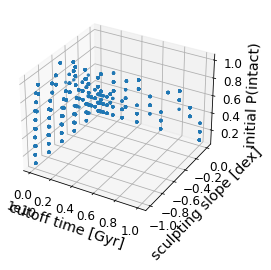

In [90]:
#%matplotlib widget

fig = plt.figure()
ax = plt.axes(projection='3d')

im = ax.scatter3D(good_models.cs, good_models.ms, good_models.bs, s=5)
#im1 = ax.scatter3D(df_keep.loc[df_keep.index==1220].c, df_keep.loc[df_keep.index==1220].m, df_keep.loc[df_keep.index==1220].b, s=8, c='r')
#im2 = ax.scatter3D(df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, s=8, c='purple')
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('sculpting slope [dex]')
ax.set_zlabel('initial P(intact)')
#fig.colorbar(im, ax=ax)
#fig.tight_layout()
plt.show()

In [ ]:
def argmedian(x):
    return np.argpartition(x, len(x) // 2)[len(x) // 2] # // is floor division

Build zero bins for both DataFrames

In [6]:
zero_bins = []
transit_multiplicity_zero_bin = []
for j, i in enumerate(truth.transit_multiplicities[:]):
    zero_bins.append(total_stars-np.sum(i))
    temp = truth.reset_index().transit_multiplicities[:][j]
    temp.insert(0,total_stars - np.sum(i))
    transit_multiplicity_zero_bin.append(temp)
truth['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

zero_bins = []
transit_multiplicity_zero_bin = []
for j, i in enumerate(recovery.transit_multiplicities[:]):
    zero_bins.append(total_stars-np.sum(i))
    temp = recovery.reset_index().transit_multiplicities[:][j]
    temp.insert(0,total_stars - np.sum(i))
    transit_multiplicity_zero_bin.append(temp)
recovery['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

Pad transit multiplicities with zeros so they're all the same length.

In [7]:
def pad(lam):
    lam += [0.] * (7 - len(lam)) # pad with zeros to match length of k
    return lam

truth['transit_multiplicities'] = truth.transit_multiplicities.apply(pad)
recovery['transit_multiplicities'] = recovery.transit_multiplicities.apply(pad)


#### See if injection-recovery works for a single model

m = -1, b = 0.5, c = 1e9, f = 0.3

In [8]:
tm = truth.loc[(truth.ms == -1) & (truth.bs == 0.5) & (truth.cs == 1e9) & (np.round(truth.fs,1) == 0.3)].transit_multiplicities

tm_recovery = recovery.loc[(recovery.ms == -1) & (recovery.bs == 0.5) & (recovery.cs == 1e9) & (np.round(recovery.fs,1) == 0.3)].transit_multiplicities.to_list()

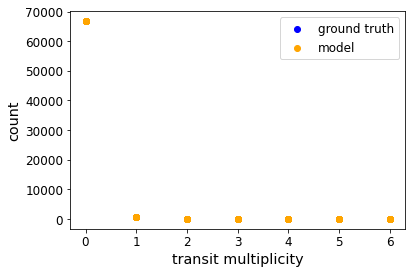

In [9]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.scatter(np.arange(len(np.sum(tm))), np.sum(tm), label='ground truth', color='blue')
plt.scatter(np.arange(len(tm_recovery[0])), tm_recovery[0], label='model', color='orange')

for i in tm_recovery[1:]:
    plt.scatter(np.arange(len(i)), i, color='orange')

plt.ylabel('count')
plt.xlabel('transit multiplicity')
#plt.xlim([-0.5,6])
plt.legend()
plt.show()

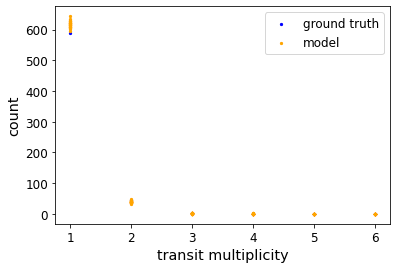

In [10]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.scatter(np.arange(len(np.sum(tm)))[1:], np.sum(tm)[1:], label='ground truth', color='blue', s=5)
plt.scatter(np.arange(len(tm_recovery[0]))[1:], tm_recovery[0][1:], label='model', color='orange', s=5)

for i in tm_recovery[1:]:
    plt.scatter(np.arange(len(i))[1:], i[1:], color='orange', s=5)

plt.ylabel('count')
plt.xlabel('transit multiplicity')
#plt.xlim([-0.5,6])
plt.legend()
plt.show()

Ok, so whether or not I include the zero-bin, our injection-recovery envelopes the ground truth, at least for the middling fiducial model I chose. Now how about for all of them?

In [6]:
def prior_grid_logslope(cube, ndim, nparams, gi_m, gi_b, gi_c):
    """
    Each model run will use an evenly spaced (m,b, cutoff) tuple on a discrete 11x11x11 3D grid
    We're doing log(time), so slope is sampled linearly (everything gets logged together later)
    If a cutoff results in a zero probability, don't bother 

    gi_m: grid index on m axis
    gi_b: grid index on b axis
    gi_c: grid index for cutoff time axis
    """
    #cube[0] = -1e-9*np.logspace(8,10,11)[gi_m] # convert from year to Gyr
    cube[0] = np.linspace(-2,0,3)[gi_m] 
    cube[1] = np.linspace(0,1,3)[gi_b]
    #cube[2] = np.logspace(1e8,1e10,11)
    cube[2] = np.round(np.logspace(8,10,11)[gi_c], 0) # in Ballard et al in prep, they use log(yrs) instead of drawing yrs from logspace
    return cube

In [ ]:
cube = [0,0,0]
fs = np.round(np.linspace(0.1, 1.), 1)
ndim = 3
nparams = 3
for gi_m in range(3):

    for gi_b in range(2):
        gi_b = gi_b + 1

        for gi_c in range(11):
            #print(gi_m, gi_b, gi_c) # so I know where I am
            cube = prior_grid_logslope(cube, ndim, nparams, gi_m, gi_b, gi_c)

            for f in fs:
                #recovery_min = []
                #recovery_max = []
                #recovery_avg = []
                #print(cube)
                tm = truth.loc[(truth.ms == cube[0]) & (truth.bs == cube[1]) & (np.round(truth.cs, 0) == cube[2]) & (np.round(truth.fs,1) == f)].transit_multiplicities
                tm_recovery = recovery.loc[(recovery.ms == cube[0]) & (recovery.bs == cube[1]) & (np.round(recovery.cs, 0) == cube[2]) & (np.round(recovery.fs,1) == f)].transit_multiplicities.to_list()
                
                # take min/max envelopes and avg for tm_recovery
                for i in range(len(np.sum(tm))):
                    fail = False
                    #recovery_min.append(np.amin(np.take(tm_recovery, indices=i, axis=1)))
                    #recovery_max.append(np.amax(np.take(tm_recovery, indices=i, axis=1)))
                    #recovery_avg.append(np.mean(np.take(tm_recovery, indices=i, axis=1)))

                    # flag whenever a model's ground truth is not successfully recovered
                    min_elt = np.amin(np.take(tm_recovery, indices=i, axis=1))
                    max_elt = np.amax(np.take(tm_recovery, indices=i, axis=1))
                    avg_elt = np.mean(np.take(tm_recovery, indices=i, axis=1))
                    
                    if (np.sum(tm)[i] <= max_elt) and (np.sum(tm)[i] >= min_elt):
                        continue
                    else:
                        fail = True
                        #print(cube, f)
                        #print(min_elt, np.sum(tm)[i], max_elt)
                        
                if fail == True:
                    print(cube, f, min_elt, np.sum(tm)[i], max_elt, tm_recovery, i,
                         np.amin(np.take(tm_recovery, indices=i, axis=1)),
                         np.amax(np.take(tm_recovery, indices=i, axis=1)),
                         np.mean(np.take(tm_recovery, indices=i, axis=1)))
                    asdfa
                    
                #print(recovery_min)
                #print(np.sum(tm))
                #afdf

Seems like all models match. But to pass the injection-recovery test, the marginalized posterior must show that the favored model is the original ground truth model.

### Posteriors

#### Fiducial model

In [17]:
tm_fiducial = truth.loc[(np.round(truth.ms, 1) == -1) & (truth.bs == 0.5) & (truth.cs == 1e9) & (np.round(truth.fs,1) == 0.3)].transit_multiplicities

tm_recovery = recovery.loc[(recovery.ms == -1) & (recovery.bs == 0.5) & (recovery.cs == 1e9) & (np.round(recovery.fs,1) == 0.3)].transit_multiplicities.to_list()

In [158]:
def better_loglike(lam, k):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of ints)
    - k: Kepler transit multiplicity (list of ints); can accept alternate ground truths as well

    Returns: Poisson log likelihood (float)
    """

    # in the rare occasion that a simulated system has 7+ planets, throw them into the 6+ bin
    if len(k) < len(lam): 
        extras = lam[len(k):]
        sum_extras = np.sum(extras)
        lam[5] += sum_extras
    lam = lam[:6]
    
    logL = []
    for i in range(len(lam)):
        if lam[i]==0:
            term3 = -lgamma(k[i]+1)
            term2 = -lam[i]
            term1 = 0
            logL.append(term1+term2+term3)

        else:
            term3 = -lgamma(k[i]+1)
            term2 = -lam[i]
            term1 = k[i]*np.log(lam[i])
            logL.append(term1+term2+term3)

    return np.sum(logL)

#better_loglike(tm_recovery[0], np.sum(tm))

In [46]:
cube = [0,0,0]
fs = np.round(np.linspace(0.1, 1.), 1)
ndim = 3
nparams = 3

ms = []
bs = []
cs = []
fs_for_df = []
all_logLs = []

for gi_m in range(3):
    
    for gi_b in range(2):
        gi_b = gi_b + 1

        for gi_c in range(11):
            cube = prior_grid_logslope(cube, ndim, nparams, gi_m, gi_b, gi_c)
            
            for f in fs:
                
                ms.append(cube[0])
                bs.append(cube[1])
                cs.append(cube[2])
                fs_for_df.append(f)
                
                tm = truth.loc[(truth.ms == cube[0]) & (truth.bs == cube[1]) & (np.round(truth.cs, 0) == cube[2]) & (np.round(truth.fs,1) == f)].transit_multiplicities
                tm_recovery = recovery.loc[(recovery.ms == cube[0]) & (recovery.bs == cube[1]) & (np.round(recovery.cs, 0) == cube[2]) & (np.round(recovery.fs,1) == f)].transit_multiplicities.to_list()
                
                # calculate logL for each realization of each model, using tm as the ground truth
                logLs = []
                for i in range(len(tm_recovery)):
                    logL = better_loglike(tm_recovery[i], np.sum(tm_fiducial))
                    logLs.append(logL)
                
                # get best logL for each model
                best_logL = np.max(logLs)
                    
                all_logLs.append(best_logL)
                

In [47]:
model_logLs = pd.DataFrame({'m': ms, 'b': bs, 'c': cs, 'f': fs_for_df, 'logL': all_logLs})
model_logLs

,m,b,c,f,logL
0,-2.0,0.5,1.000000e+08,0.1,-246.029389
1,-2.0,0.5,1.000000e+08,0.1,-246.029389
2,-2.0,0.5,1.000000e+08,0.1,-246.029389
3,-2.0,0.5,1.000000e+08,0.2,-132.552072
4,-2.0,0.5,1.000000e+08,0.2,-132.552072
...,...,...,...,...,...
3295,0.0,1.0,1.000000e+10,0.9,-2467.495664
3296,0.0,1.0,1.000000e+10,0.9,-2467.495664
3297,0.0,1.0,1.000000e+10,1.0,-2860.027559
3298,0.0,1.0,1.000000e+10,1.0,-2860.027559


[-603561.5948414556, -675303.3075248096, -1120593.679552332]


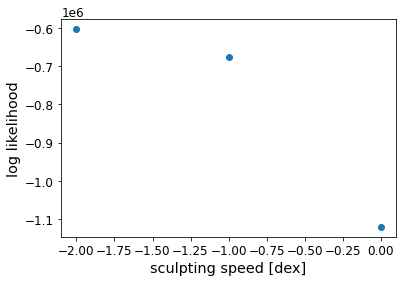

In [162]:
# marginalize in 1D
marginalized_logLs = []
for gi_m in range(3):

    cube = prior_grid_logslope(cube, ndim, nparams, gi_m, gi_b, gi_c)
    
    # subset
    only = model_logLs.loc[(model_logLs.m == cube[0])]# & (model_logLs.f == 0.3)]
    
    # marginalize logL
    marginalized_logLs.append(np.sum(only.logL))
print(marginalized_logLs)

plt.scatter(truth.ms.unique(), marginalized_logLs)
plt.ylabel("log likelihood")
plt.xlabel("sculpting speed [dex]")
plt.show()

In [189]:
model_logLs.loc[np.round(model_logLs.m, 1) == -2].groupby(['c','b']).mean('logL').reset_index().logL.sum()

-12071.231896829113

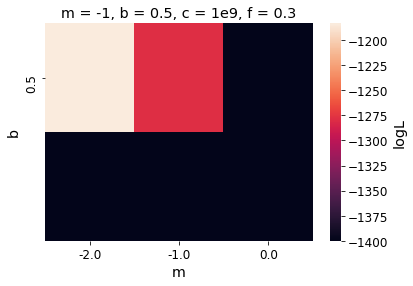

In [54]:
piv = model_logLs.loc[model_logLs.f == 0.3].groupby(['m','b','c']).mean('logL').reset_index().groupby(['m','b']).sum('logL').reset_index()

piv = piv.pivot("b","m","logL") # vs logged_normalized_likelihood
#print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
#print(np.log(np.nanmin(piv.values)), np.log(np.nanmax(piv.values)))

fig, ax = plt.subplots()
sns.heatmap(piv, yticklabels=model_logLs.b.unique().round(1), cbar_kws={'label': 'logL'}, vmin=-1400)
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
plt.title('m = -1, b = 0.5, c = 1e9, f = 0.3')
plt.show()

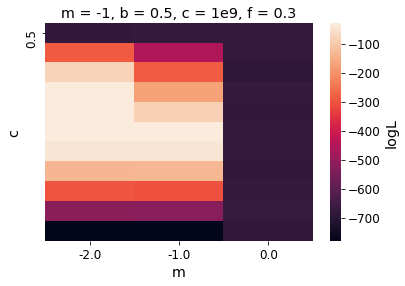

In [147]:
piv = model_logLs.loc[model_logLs.f == 0.3].groupby(['m','b','c']).mean('logL').reset_index().groupby(['m','c']).sum('logL').reset_index()

piv = piv.pivot("c","m","logL") # vs logged_normalized_likelihood
#print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
#print(np.log(np.nanmin(piv.values)), np.log(np.nanmax(piv.values)))

fig, ax = plt.subplots()
sns.heatmap(piv, yticklabels=model_logLs.b.unique().round(1), cbar_kws={'label': 'logL'})
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
plt.title('m = -1, b = 0.5, c = 1e9, f = 0.3')
plt.show()

#### Check 1D marginalized posteriors, and finish this for full set of m and b. Then do this for a few other models. 

There are the following degeneracies: when the ground truth is moderate sculpting, we favor moderate sculpting, as well as 1) moderate longevity and initial intact fraction but fast sculpting; and, to a lesser extent, 2) no sculpting and moderate initial intact fraction. How can that be? I guess there are so few stars younger than 1 Gyr that calling it moderate is a bit disingenous. Perhaps I should try another slice of model space, close to 4 or 5 Gyrs. 

#### Now, for all models

In [ ]:
cube = [0,0,0]
fs = np.round(np.linspace(0.1, 1.), 1)
ndim = 3
nparams = 3

ms = []
bs = []
cs = []
fs_for_df = []
all_logLs = []

for gi_m in range(3):
    
    for gi_b in range(2):
        gi_b = gi_b + 1

        for gi_c in range(3):
            cube = prior_grid_logslope(cube, ndim, nparams, gi_m, gi_b, gi_c)
            
            for f in fs:
                
                ms.append(cube[0])
                bs.append(cube[1])
                cs.append(cube[2])
                fs_for_df.append(f)
                
                tm = truth.loc[(truth.ms == cube[0]) & (truth.bs == cube[1]) & (truth.cs == cube[2]) & (np.round(truth.fs,1) == f)].transit_multiplicities
                tm_recovery = recovery.loc[(recovery.ms == cube[0]) & (recovery.bs == cube[1]) & (recovery.cs == cube[2]) & (np.round(recovery.fs,1) == f)].transit_multiplicities.to_list()
                
                # calculate logL for each realization of each model, using tm as the ground truth
                logLs = []
                for i in range(len(tm_recovery)):
                    logL = better_loglike(tm_recovery[i], np.sum(tm_fiducial))
                    logLs.append(logL)
                
                # get best logL for each model
                best_logL = np.amax(logLs)
                all_logLs.append(best_logL)
                

### Quick, fiducial plots for ERES slides

Show example difference in observed transit multiplicity yields for intact vs disrupted systems

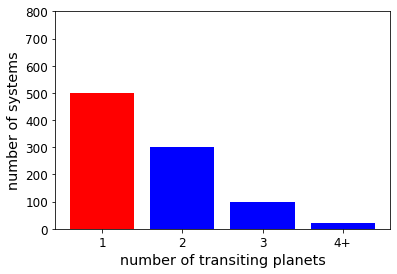

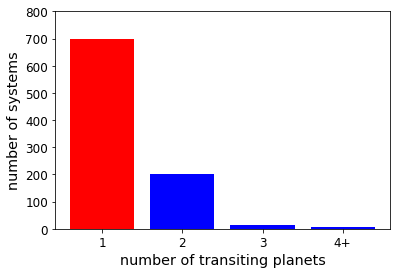

In [90]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#bar_eres = pd.DataFrame({'transits': ['0', '1', '2', '3+']}) # for the x axis label
bar_eres = pd.DataFrame({'transits': ['1', '2', '3', '4+']}) # for the x axis label
c = ['red', 'blue', 'blue', 'blue'] # bar colors

plt.bar(bar_eres.transits, [500, 300, 100, 20], color=c)
plt.xlabel('number of transiting planets')
plt.ylabel('number of systems')
plt.ylim([0, 800])
#plt.savefig(path+'figures/intact.png', facecolor='white', edgecolor='white', bbox_inches='tight')
plt.show()

c = ['red', 'blue', 'blue', 'blue'] # bar colors
plt.bar(bar_eres.transits, [700, 200, 15, 5], color=c)
plt.xlabel('number of transiting planets')
plt.ylabel('number of systems')
plt.ylim([0, 800])
#plt.savefig(path+'figures/disrupted.png', facecolor='white', edgecolor='white', bbox_inches='tight')
plt.show()

### Comparison with PAST Collaboration's Kinematic Ages

Plot Figure 4, Yang+ 2022 from http://www.lamost.org/publications/upload/2022/Yang%20Jiayi-AJ(2022).pdf

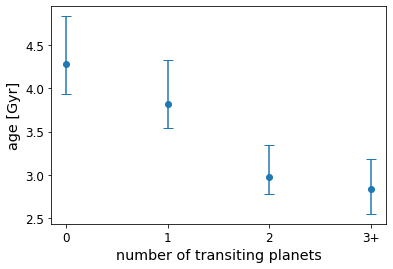

In [10]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

chen_comparison = pd.DataFrame({'multi': ['0', '1', '2', '3+'], 
                               'age': [4.28, 3.82, 2.98, 2.84],
                               'err1': [0.55, 0.5, 0.36, 0.34],
                               'err2': [0.35, 0.28, 0.2, 0.29]})

#plt.errorbar([1], [np.median(ones.iso_age)], yerr=[[-np.median(ones.iso_age_err2)], [np.median(ones.iso_age_err1)]], fmt='o')
plt.errorbar(chen_comparison.multi, chen_comparison.age, yerr=[chen_comparison.err2, chen_comparison.err1],
            fmt='o', capsize=5)

plt.ylabel('age [Gyr]')
plt.xlabel('number of transiting planets')
#plt.savefig(path+'figures/past-ii.png', facecolor='white', edgecolor='white', bbox_inches='tight')
plt.show()

Do any sculpting laws produce distributions that match the PAST data?

In [11]:
me_vs_past = pd.read_csv(path+'past_ii_recovery.csv', sep=',')
me_vs_past

,ms,bs,cs,fs,nontransit_age_maxes,nontransit_age_mins,ones_age_maxes,ones_age_mins,twos_age_maxes,twos_age_mins,threes_age_maxes,threes_age_mins
0,-2.0,0.0,1.000000e+08,0.1,5.903495,1.760284,5.817271,1.772852,5.492887,1.658351,NaN,NaN
1,-2.0,0.0,1.000000e+08,0.2,5.903301,1.760487,5.821405,1.763301,5.402262,1.629167,NaN,NaN
2,-2.0,0.0,1.000000e+08,0.3,5.902648,1.760186,5.807636,1.767149,5.805735,1.788088,NaN,NaN
3,-2.0,0.0,1.000000e+08,0.4,5.901691,1.760346,5.869113,1.761241,5.777778,1.717556,NaN,NaN
4,-2.0,0.0,1.000000e+08,0.5,5.901868,1.760148,5.863256,1.791568,5.425161,1.499355,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21605,0.0,1.0,1.000000e+10,1.0,5.908368,1.762983,NaN,NaN,NaN,NaN,NaN,NaN
21606,0.0,1.0,1.000000e+10,1.0,5.907817,1.762882,NaN,NaN,NaN,NaN,NaN,NaN
21607,0.0,1.0,1.000000e+10,1.0,5.905314,1.761853,NaN,NaN,NaN,NaN,NaN,NaN
21608,0.0,1.0,1.000000e+10,1.0,5.908594,1.762937,NaN,NaN,NaN,NaN,NaN,NaN


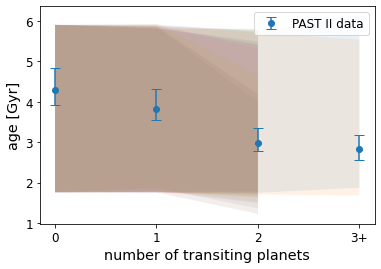

In [160]:
for row, j in enumerate(me_vs_past):
    plt.fill_between(['0', '1', '2', '3+'], [me_vs_past['nontransit_age_maxes'][row], 
                                            me_vs_past['ones_age_maxes'][row],
                                            me_vs_past['twos_age_maxes'][row],
                                            me_vs_past['threes_age_maxes'][row]], 
                     [me_vs_past['nontransit_age_mins'][row], me_vs_past['ones_age_mins'][row],
                      me_vs_past['twos_age_mins'][row], me_vs_past['threes_age_mins'][row]],
                    alpha=0.1)
plt.errorbar(chen_comparison.multi, chen_comparison.age, yerr=[chen_comparison.err2, chen_comparison.err1],
        fmt='o', capsize=5, label='PAST II data')
    
plt.ylabel('age [Gyr]')
plt.xlabel('number of transiting planets')
plt.legend()
plt.show()

We are not agreeing with our isochrone ages from the Berger crossmatch. Let's introduce Sheila Sagear's kinematic ages from Gaia. 

In [12]:
hdul = fits.open(path+'kinematic-ages/Kepler_Age_Predictions.fits')

In [58]:
hdul_df = pd.DataFrame({'kepid': hdul[1].data['kepid'].byteswap().newbyteorder(), 
                        'age16_MSTO': hdul[1].data['age16_MSTO'].byteswap().newbyteorder(),
                       'age50_MSTO': hdul[1].data['age50_MSTO'].byteswap().newbyteorder(), 
                        'age84_MSTO': hdul[1].data['age84_MSTO'].byteswap().newbyteorder()})
hdul_df

,kepid,age16_MSTO,age50_MSTO,age84_MSTO
0,757076,0.854855,2.998999,7.287287
1,757099,0.658659,2.396396,6.096096
2,757137,0.938939,3.237237,7.679680
3,757280,1.247247,4.022022,8.800801
4,891901,1.639640,4.876877,9.753754
...,...,...,...,...
100950,12935035,1.681682,4.946947,9.823824
100951,12984200,6.894895,10.538539,12.962963
100952,12984227,7.287287,10.776777,13.033033
100953,12984307,6.222222,10.076076,12.808809


Cross-match these kinematic ages with the Berger Kepler-Gaia cross-match

In [48]:
berger = pd.read_csv(path+'data/berger_kepler_stellar_fgk.csv')
berger

/Users/chris/anaconda2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (138) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,kepid,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh_x,feh_err1,...,feh_y,feh_err,RUWE,num_gaia_companions,Kmag_final_prov,evstate,logR,is_giant,fractional_err1,fractional_err2
0,757280,2MASS J19242289+3633538,6543,162.0,-194.0,4.082,0.258,-0.172,-0.24,0.25,...,NaN,NaN,0.8704,0,NaN,NaN,0.416641,False,0.161290,-0.129032
1,892195,2MASS J19240520+3638374,5522,194.0,-155.0,3.984,0.510,-0.170,-0.06,0.30,...,NaN,NaN,1.1211,0,NaN,NaN,-0.000869,False,0.244584,-0.322152
2,892667,2MASS J19243045+3637186,6609,159.0,-227.0,4.105,0.246,-0.164,-0.26,0.25,...,NaN,NaN,0.8674,0,NaN,NaN,0.337060,False,0.205128,-0.179487
3,892678,2MASS J19243108+3638316,6137,167.0,-186.0,3.936,0.428,-0.143,-0.26,0.30,...,NaN,NaN,0.9852,1,BinaryCorr,NaN,0.529174,False,0.048649,-0.064865
4,892713,2MASS J19243353+3637220,6106,186.0,-186.0,3.854,0.496,-0.124,-0.24,0.30,...,NaN,NaN,0.9872,1,BinaryCorr,NaN,0.561578,False,0.076389,-0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67375,12935035,2MASS J19204068+5218589,6071,192.0,-234.0,3.992,0.382,-0.127,-0.06,0.25,...,0.012,0.15,1.0144,0,NaN,NaN,0.282849,False,0.161100,-0.332024
67376,12983952,2MASS J19194126+5224230,5365,175.0,-191.0,4.571,0.032,-0.136,0.12,0.25,...,NaN,NaN,1.0901,0,NaN,NaN,0.100715,False,0.179922,-0.217080
67377,12984000,2MASS J19194837+5225067,5835,174.0,-192.0,4.464,0.084,-0.196,-0.26,0.30,...,0.038,0.15,0.9243,0,NaN,NaN,0.335658,False,0.146396,-0.128378
67378,12984200,2MASS J19201625+5224552,5862,161.0,-161.0,4.459,0.084,-0.182,-0.28,0.30,...,-0.050,0.15,1.1178,0,NaN,NaN,0.264109,False,0.184165,-0.203098


In [59]:
kinematic_berger = berger.merge(hdul_df, on='kepid')
kinematic_berger

,kepid,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh_x,feh_err1,...,num_gaia_companions,Kmag_final_prov,evstate,logR,is_giant,fractional_err1,fractional_err2,age16_MSTO,age50_MSTO,age84_MSTO
0,757280,2MASS J19242289+3633538,6543,162.0,-194.0,4.082,0.258,-0.172,-0.24,0.25,...,0,NaN,NaN,0.416641,False,0.161290,-0.129032,1.247247,4.022022,8.800801
1,892195,2MASS J19240520+3638374,5522,194.0,-155.0,3.984,0.510,-0.170,-0.06,0.30,...,0,NaN,NaN,-0.000869,False,0.244584,-0.322152,0.560561,2.074074,5.367367
2,892667,2MASS J19243045+3637186,6609,159.0,-227.0,4.105,0.246,-0.164,-0.26,0.25,...,0,NaN,NaN,0.337060,False,0.205128,-0.179487,3.335335,7.413413,11.659660
3,892678,2MASS J19243108+3638316,6137,167.0,-186.0,3.936,0.428,-0.143,-0.26,0.30,...,1,BinaryCorr,NaN,0.529174,False,0.048649,-0.064865,1.919920,5.381381,10.230230
4,892713,2MASS J19243353+3637220,6106,186.0,-186.0,3.854,0.496,-0.124,-0.24,0.30,...,1,BinaryCorr,NaN,0.561578,False,0.076389,-0.208333,2.522523,6.348348,11.001001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34311,12934848,2MASS J19201615+5221593,6438,179.0,-246.0,4.340,0.087,-0.203,-0.10,0.25,...,0,NaN,NaN,0.325721,False,0.411523,-0.139918,1.331331,4.204204,9.025025
34312,12934947,2MASS J19202764+5218371,6440,144.0,-192.0,4.380,0.058,-0.173,-0.04,0.25,...,0,NaN,NaN,0.164650,False,0.452096,-0.293413,2.578579,6.432432,11.057057
34313,12935035,2MASS J19204068+5218589,6071,192.0,-234.0,3.992,0.382,-0.127,-0.06,0.25,...,0,NaN,NaN,0.282849,False,0.161100,-0.332024,1.681682,4.946947,9.823824
34314,12984200,2MASS J19201625+5224552,5862,161.0,-161.0,4.459,0.084,-0.182,-0.28,0.30,...,0,NaN,NaN,0.264109,False,0.184165,-0.203098,6.894895,10.538539,12.962963


Now for planet hosts

In [77]:
planet_hosts = pd.read_csv(path+'data/pnum_plus_cands_fgk.csv')
kinematic_planet_hosts = planet_hosts.merge(hdul_df, on='kepid')
kinematic_planet_hosts

,kepid,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh_x,feh_err1,...,num_gaia_companions,Kmag_final_prov,evstate,logR,is_giant,fractional_err1,fractional_err2,age16_MSTO,age50_MSTO,age84_MSTO
0,1871056,2MASS J19281070+3722344,6207,112.0,-125.0,3.963,0.195,-0.105,0.24,0.15,...,0,NaN,NaN,0.301030,False,0.239496,-0.168067,4.246246,8.380380,12.150150
1,1871056,2MASS J19281070+3722344,6207,112.0,-125.0,3.963,0.195,-0.105,0.24,0.15,...,0,NaN,NaN,0.301030,False,0.239496,-0.168067,4.246246,8.380380,12.150150
2,2019199,2MASS J19295668+3724156,5671,73.0,-73.0,3.942,0.203,-0.087,0.44,0.05,...,0,NaN,NaN,0.199206,False,0.436585,-0.217073,2.368368,6.138138,10.832833
3,2161949,2MASS J19271509+3733211,5683,154.0,-154.0,4.326,0.170,-0.187,0.08,0.25,...,0,NaN,NaN,0.019532,False,0.527540,-0.487148,2.746747,6.656657,11.211211
4,2161949,2MASS J19271509+3733211,5683,154.0,-154.0,4.326,0.170,-0.187,0.08,0.25,...,0,NaN,NaN,0.019532,False,0.527540,-0.487148,2.746747,6.656657,11.211211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,12602999,2MASS J19232978+5141066,6787,182.0,-202.0,3.762,0.285,-0.095,-0.16,0.30,...,0,NaN,NaN,0.198382,False,0.465347,-0.475248,2.676677,6.572573,11.141141
838,12690465,2MASS J19184894+5152181,6782,165.0,-260.0,4.249,0.128,-0.192,-0.30,0.25,...,1,BinaryCorr,NaN,0.241795,False,0.196629,-0.213483,4.288288,8.436436,12.178178
839,12735793,2MASS J19190999+5159373,6185,167.0,-167.0,3.868,0.292,-0.097,0.00,0.25,...,0,NaN,NaN,0.106531,False,0.549839,-0.408360,3.909910,8.044044,11.995996
840,12737015,2MASS J19215521+5157540,6059,109.0,-146.0,4.151,0.168,-0.112,0.16,0.15,...,0,NaN,NaN,0.324899,False,0.238938,-0.163717,3.951952,8.086086,12.010010


Get transit multiplicity for each kepid with planets. Get age spreads for these. Then remove these kepids from the berger DataFrame. Then get the age spread for those kepids. Then plot!

In [78]:
kinematic_planet_hosts.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count()

,kepid
koi_count,
1,489
2,98
3,31
4,11
5,4


In [79]:
kinematic_planet_hosts['calculated_count'] = kinematic_planet_hosts.groupby('kepid').transform('count').koi_count

I'm not sure whether to calculate the 1-$\sigma$ bounds using the given uncertainties from each star or calculating the standard deviation directly from the mean of each sub-sample.

In [115]:
ones = kinematic_planet_hosts.loc[kinematic_planet_hosts.calculated_count == 1].age50_MSTO
twos = kinematic_planet_hosts.loc[kinematic_planet_hosts.calculated_count == 2].age50_MSTO
threes = kinematic_planet_hosts.loc[kinematic_planet_hosts.calculated_count >= 3].age50_MSTO

ones_mean = np.mean(np.array(ones))
ones_plus = np.std(np.array(ones)) # or do I do np.mean(np.array(^^.age16_MSTO))?
ones_minus = np.std(np.array(ones))
ones_plus = np.mean(np.array(kinematic_planet_hosts.loc[kinematic_planet_hosts.calculated_count == 1].age84_MSTO - ones))
ones_minus = np.mean(np.array(ones - kinematic_planet_hosts.loc[kinematic_planet_hosts.calculated_count == 1].age16_MSTO))

twos_mean = np.mean(np.array(twos))
twos_plus = np.std(np.array(twos))
twos_minus = np.std(np.array(twos))
twos_plus = np.mean(np.array(kinematic_planet_hosts.loc[kinematic_planet_hosts.calculated_count == 2].age84_MSTO - twos))
twos_minus = np.mean(np.array(twos - kinematic_planet_hosts.loc[kinematic_planet_hosts.calculated_count == 2].age16_MSTO))

threes_mean = np.mean(np.array(threes))
threes_plus = np.std(np.array(threes))
threes_minus = np.std(np.array(threes))
threes_plus = np.mean(np.array(kinematic_planet_hosts.loc[kinematic_planet_hosts.calculated_count >= 3].age84_MSTO - threes))
threes_minus = np.mean(np.array(threes - kinematic_planet_hosts.loc[kinematic_planet_hosts.calculated_count >= 3].age16_MSTO))


Remove planet-hosts from Berger-kinematic cross-match

In [117]:
zeros = kinematic_berger.loc[~kinematic_berger.kepid.isin(kinematic_planet_hosts.kepid)].age50_MSTO
zeros_mean = np.mean(np.array(zeros))
zeros_plus = np.std(np.array(zeros))
zeros_minus = np.std(np.array(zeros))
zeros_plus = np.mean(np.array(kinematic_berger.loc[~kinematic_berger.kepid.isin(kinematic_planet_hosts.kepid)].age84_MSTO - zeros))
zeros_minus = np.mean(np.array(zeros - kinematic_berger.loc[~kinematic_berger.kepid.isin(kinematic_planet_hosts.kepid)].age16_MSTO))

Plot

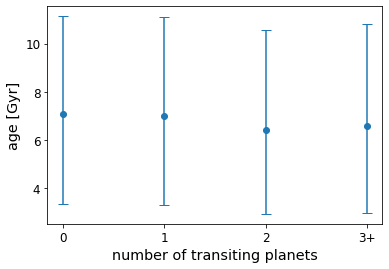

In [118]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

kinematic_comparison = pd.DataFrame({'multi': ['0', '1', '2', '3+'], 
                               'age': [zeros_mean, ones_mean, twos_mean, threes_mean],
                               'err1': [zeros_plus, ones_plus, twos_plus, threes_plus],
                               'err2': [zeros_minus, ones_minus, twos_minus, threes_minus]})

#plt.errorbar([1], [np.median(ones.iso_age)], yerr=[[-np.median(ones.iso_age_err2)], [np.median(ones.iso_age_err1)]], fmt='o')
plt.errorbar(kinematic_comparison.multi, kinematic_comparison.age, 
             yerr=[kinematic_comparison.err2, kinematic_comparison.err1],
            fmt='o', capsize=5)

plt.ylabel('age [Gyr]')
plt.xlabel('number of transiting planets')
#plt.savefig(path+'figures/past-ii.png', facecolor='white', edgecolor='white', bbox_inches='tight')
plt.show()

Unlike PAST II, we do not see changes in age spread with transit multiplicity.

Overplot Berger isochrone ages

In [126]:
planet_hosts['calculated_count'] = planet_hosts.groupby('kepid').transform('count').koi_count

ones = planet_hosts.loc[planet_hosts.calculated_count == 1]
ones_mean = np.mean(ones.iso_age)
ones_plus = np.mean(ones.iso_age_err1)
ones_minus = np.mean(ones.iso_age_err2)

twos = planet_hosts.loc[planet_hosts.calculated_count == 2]
twos_mean = np.mean(twos.iso_age)
twos_plus = np.mean(twos.iso_age_err1)
twos_minus = np.mean(twos.iso_age_err2)

threes = planet_hosts.loc[planet_hosts.calculated_count >= 3]
threes_mean = np.mean(threes.iso_age)
threes_plus = np.mean(threes.iso_age_err1)
threes_minus = np.mean(threes.iso_age_err2)

zeros = berger.loc[~berger.kepid.isin(planet_hosts.kepid)]
zeros_mean = np.mean(zeros.iso_age)
zeros_plus = np.mean(zeros.iso_age_err1)
zeros_minus = np.mean(zeros.iso_age_err2)

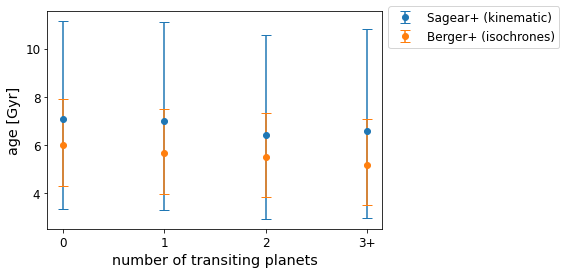

In [132]:
berger_comparison = pd.DataFrame({'multi': ['0', '1', '2', '3+'], 
                               'age': [zeros_mean, ones_mean, twos_mean, threes_mean],
                               'err1': [zeros_plus, ones_plus, twos_plus, threes_plus],
                               'err2': np.abs([zeros_minus, ones_minus, twos_minus, threes_minus])})

plt.errorbar(kinematic_comparison.multi, kinematic_comparison.age, 
             yerr=[kinematic_comparison.err2, kinematic_comparison.err1],
            fmt='o', capsize=5, label='Sagear+ (kinematic)')

plt.errorbar(berger_comparison.multi, berger_comparison.age, 
             yerr=[berger_comparison.err2, berger_comparison.err1],
            fmt='o', capsize=5, label='Berger+ (isochrones)')

plt.ylabel('age [Gyr]')
plt.xlabel('number of transiting planets')
plt.legend(bbox_to_anchor=(1., 1.05))
#plt.savefig(path+'figures/past-ii.png', facecolor='white', edgecolor='white', bbox_inches='tight')
plt.show()

Let's check that the age posteriors are consistent between Berger and the kinematic ages. We will compare posteriors for three stars, two of which are planet hosts.

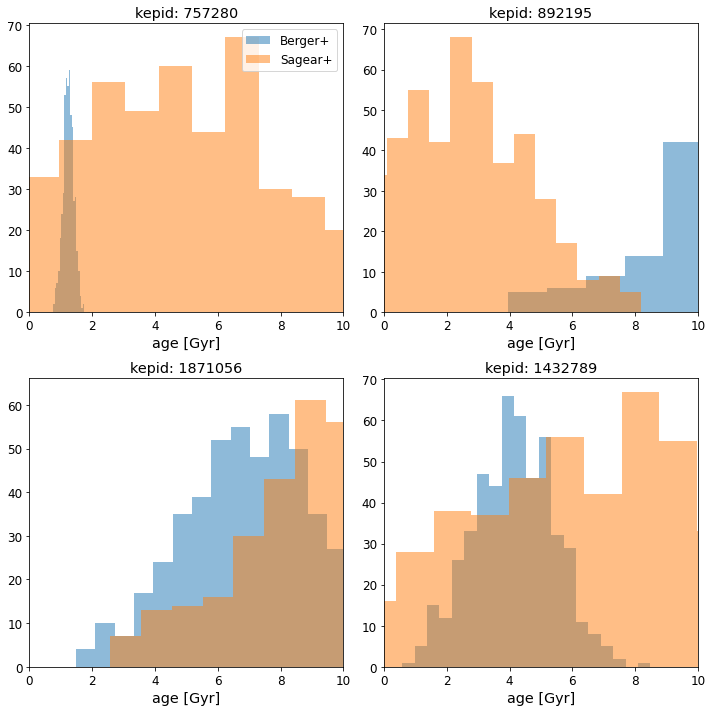

In [189]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

star1 = kinematic_berger.loc[kinematic_berger.kepid==757280]
star2 = kinematic_berger.loc[kinematic_berger.kepid==892195]
star3 = kinematic_planet_hosts.loc[planet_hosts.kepid==1871056].iloc[1]
star4 = kinematic_planet_hosts.loc[planet_hosts.kepid==1432789].iloc[1]

berger1 = np.random.normal(star1.iso_age, 0.5*(star1.iso_age_err1+np.abs(star1.iso_age_err2)), 500)
berger2 = np.random.normal(star2.iso_age, 0.5*(star2.iso_age_err1+np.abs(star2.iso_age_err2)), 500)
berger3 = np.random.normal(star3.iso_age, 0.5*(star3.iso_age_err1+np.abs(star3.iso_age_err2)), 500)
berger4 = np.random.normal(star4.iso_age, 0.5*(star4.iso_age_err1+np.abs(star4.iso_age_err2)), 500)

sagear1 = np.random.normal(star1.age50_MSTO, 0.5*(star1.age50_MSTO-star1.age16_MSTO + star1.age84_MSTO-star1.age50_MSTO), 500)
sagear2 = np.random.normal(star2.age50_MSTO, 0.5*(star2.age50_MSTO-star2.age16_MSTO + star2.age84_MSTO-star2.age50_MSTO), 500)
sagear3 = np.random.normal(star3.age50_MSTO, 0.5*(star3.age50_MSTO-star3.age16_MSTO + star3.age84_MSTO-star3.age50_MSTO), 500)
sagear4 = np.random.normal(star4.age50_MSTO, 0.5*(star4.age50_MSTO-star4.age16_MSTO + star4.age84_MSTO-star4.age50_MSTO), 500)

ax1.hist(berger1, bins=20, label='Berger+', alpha=0.5)
ax1.hist(sagear1, bins=20, label='Sagear+', alpha=0.5)
ax1.set_xlim([0, 10])
ax1.legend()
ax1.set_xlabel('age [Gyr]')
ax1.set_title('kepid: 757280')

ax2.hist(berger2, bins=20, label='Berger+', alpha=0.5)
ax2.hist(sagear2, bins=20, label='Sagear+', alpha=0.5)
ax2.set_xlim([0, 10])
ax2.set_xlabel('age [Gyr]')
ax2.set_title('kepid: 892195')

ax3.hist(berger3, bins=20, label='Berger+', alpha=0.5)
ax3.hist(sagear3, bins=20, label='Sagear+', alpha=0.5)
ax3.set_xlim([0, 10])
ax3.set_xlabel('age [Gyr]')
ax3.set_title('kepid: 1871056')

ax4.hist(berger4, bins=20, label='Berger+', alpha=0.5)
ax4.hist(sagear4, bins=20, label='Sagear+', alpha=0.5)
ax4.set_xlim([0, 10])
ax4.set_xlabel('age [Gyr]')
ax4.set_title('kepid: 1432789')

plt.tight_layout()
plt.show()

In some cases, spectroscopic ages strongly disagree with kinematic ages. This means that we need to take any inference about sculpting involving kinematic ages with a grain of salt (if not with outright distrust). 

#### Junk below

In [216]:
tm = truth.loc[(truth.ms == -1) & (truth.bs == 0.5) & (truth.cs == 1e9) & (np.round(truth.fs,1) == 0.3)].transit_multiplicities
tm

82    [66724.5, 609.6000000000001, 42.30000000000000...
Name: transit_multiplicities, dtype: object

In [217]:
truth.loc[(truth.ms == -1) & (truth.bs == 0.5) & (truth.cs == 1e9) & (np.round(truth.fs,1) == 0.3)]

,ms,bs,cs,fs,transit_multiplicities,geom_transit_multiplicities,logLs,intact_fracs,disrupted_fracs,transit_multiplicity_zero_bin
82,-1.0,0.5,1.000000e+09,0.3,"[66724.5, 609.6000000000001, 42.30000000000000...","[1263.6000000000001, 129.00000000000003, 8.400...",-224.004177,0.01881,0.28119,"[66724.5, 609.6000000000001, 42.30000000000000..."


In [222]:
df = pd.read_csv(path+'systems/transits0_1_0.csv', sep=',')
df

/Users/chris/anaconda2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,4,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,kepid,iso_teff,iso_teff_err1,iso_teff_err2,feh_x,feh_err1,feh_err2,iso_age,iso_age_err1,...,incl,mutual_incl,ecc,omega,lambda_ks,second_terms,geom_transit_status,transit_status,prob_detections,sn
0,0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,-0.205712,0.003269,0.079433,5.328677,8.484696e+47,0.003165,0.0,0.0,0.0,0.0
1,0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,-0.236934,0.034490,0.109648,1.111269,6.127440e+47,0.006621,0.0,0.0,0.0,0.0
2,0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,-0.324149,0.121706,0.173780,5.676972,1.122792e+48,0.022500,0.0,0.0,0.0,0.0
3,0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,-0.190797,-0.011646,0.144544,3.499886,4.680497e+47,0.010569,0.0,0.0,0.0,0.0
4,0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,-0.206182,0.003739,0.114815,1.152918,1.010308e+48,0.006620,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243268,69294,12984200.0,5843.1,122.8,-117.6,-0.28,0.30,-0.3,5.81,1.07,...,-1.190046,0.050542,0.012023,4.015136,9.518226e+47,0.001349,0.0,0.0,0.0,0.0
243269,69294,12984200.0,5843.1,122.8,-117.6,-0.28,0.30,-0.3,5.81,1.07,...,-1.177185,0.037681,0.054954,1.144401,1.306789e+48,0.002220,0.0,0.0,0.0,0.0
243270,69294,12984200.0,5843.1,122.8,-117.6,-0.28,0.30,-0.3,5.81,1.07,...,-1.129590,-0.009914,0.173780,4.143923,8.797263e+47,0.015264,0.0,0.0,0.0,0.0
243271,69295,12984307.0,5892.6,105.7,-107.3,-0.16,0.35,-0.3,5.33,2.03,...,-0.213230,-0.184346,0.301995,5.843744,1.108083e+48,0.062843,0.0,0.0,0.0,0.0


#### Test new code for collect2() to compare age vs multiplicity

In [117]:
test = pd.read_csv(path+'systems/transits0_2_0.csv', sep=',', error_bad_lines=False)
test

b'Skipping line 12591: expected 31 fields, saw 55\nSkipping line 12593: expected 31 fields, saw 61\nSkipping line 25145: expected 31 fields, saw 47\nSkipping line 25154: expected 31 fields, saw 49\n'
b'Skipping line 37707: expected 31 fields, saw 33\nSkipping line 37734: expected 31 fields, saw 53\nSkipping line 50274: expected 31 fields, saw 56\nSkipping line 50304: expected 31 fields, saw 42\nSkipping line 62823: expected 31 fields, saw 56\nSkipping line 62860: expected 31 fields, saw 32\n'
b'Skipping line 75358: expected 31 fields, saw 54\nSkipping line 75391: expected 31 fields, saw 44\nSkipping line 87884: expected 31 fields, saw 33\nSkipping line 87919: expected 31 fields, saw 56\n'
b'Skipping line 100413: expected 31 fields, saw 51\nSkipping line 100446: expected 31 fields, saw 52\nSkipping line 112934: expected 31 fields, saw 52\nSkipping line 112972: expected 31 fields, saw 47\nSkipping line 125462: expected 31 fields, saw 44\nSkipping line 125504: expected 31 fields, saw 55\n

,Unnamed: 0,kepid,iso_teff,iso_teff_err1,iso_teff_err2,feh_x,feh_err1,feh_err2,iso_age,iso_age_err1,...,incl,mutual_incl,ecc,omega,lambda_ks,second_terms,geom_transit_status,transit_status,prob_detections,sn
0,0.0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,0.105355,-0.082448,0.063096,5.782578,7.734131e+47,0.005383,0.0,0.0,0.000000,0.000000
1,0.0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,0.089435,-0.066528,0.072444,1.155976,9.751910e+47,0.004834,0.0,0.0,0.000000,0.000000
2,0.0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,0.077447,-0.054540,0.151356,3.565841,1.157779e+48,0.012991,0.0,0.0,0.000000,0.000000
3,0.0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,0.003431,0.019476,0.151356,1.225999,4.378531e+47,0.011708,1.0,1.0,0.777231,13.772309
4,0.0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,-0.033172,0.056079,0.125893,4.028600,1.675932e+48,0.009516,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381235,69295.0,12984307.0,5892.6,105.7,-107.3,-0.16,0.35,-0.3,5.33,2.03,...,-0.386297,0.087010,0.120226,4.838540,2.593060e+47,0.011009,0.0,0.0,0.000000,0.000000
381236,69295.0,12984307.0,5892.6,105.7,-107.3,-0.16,0.35,-0.3,5.33,2.03,...,-0.362660,0.063374,0.016596,5.752006,4.606963e+47,0.002145,0.0,0.0,0.000000,0.000000
381237,69295.0,12984307.0,5892.6,105.7,-107.3,-0.16,0.35,-0.3,5.33,2.03,...,-0.256287,-0.043000,0.165959,3.358178,1.272227e+48,0.014779,0.0,0.0,0.000000,0.000000
381238,69295.0,12984307.0,5892.6,105.7,-107.3,-0.16,0.35,-0.3,5.33,2.03,...,-0.268487,-0.030799,0.041687,5.995001,3.064590e+47,0.001343,0.0,0.0,0.000000,0.000000


In [118]:
transit = test.loc[test['transit_status']==1]
# create column counting number of planets per system
transit['yield'] = 1
transit = transit.groupby(['kepid', 'iso_age', 'iso_age_err1', 'iso_age_err2'])[['yield']].count().reset_index()
print(transit)

           kepid iso_age  iso_age_err1  iso_age_err2  yield
0       757280.0    1.24          0.20         -0.16      1
1       892195.0   14.31          3.50         -4.61      2
2      1026356.0    7.29          3.69         -3.40      1
3      1027030.0    3.48          1.63         -0.64      1
4      1161092.0    2.73          0.98         -0.77      2
...          ...     ...           ...           ...    ...
4525  12785311.0    5.77          2.63         -2.24      1
4526  12833453.0   10.61          4.98         -4.66      4
4527  12833566.0    1.54          0.30         -0.24      1
4528  12833827.0    7.55          2.82         -1.49      1
4529  12834217.0    2.65          0.97         -0.74      1

[4530 rows x 5 columns]


/Users/chris/anaconda2/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [112]:
ones = transit.loc[transit['yield'] == 1]
ones_age_mean = np.mean(ones.iso_age.astype(float))
ones_age_std = np.mean(0.5 * (ones.iso_age_err1 + np.abs(ones.iso_age_err2)))

print(ones_age_mean, ones_age_std)

5.825223642172518 1.700209664536741


In [119]:
nontransit = test.loc[test['transit_status']==0]
print(len(nontransit), len(transit)) # before f is applied
print(transit.head())

samples_indices = transit.sample(frac=0.5, replace=False).index 
transit.loc[samples_indices, 'transit_status'] = 0
#nontransit = test.loc[test['transit_status']==0]
print(len(transit)) # after f is applied
print(transit.head())


373396 4530
       kepid iso_age  iso_age_err1  iso_age_err2  yield
0   757280.0    1.24          0.20         -0.16      1
1   892195.0   14.31          3.50         -4.61      2
2  1026356.0    7.29          3.69         -3.40      1
3  1027030.0    3.48          1.63         -0.64      1
4  1161092.0    2.73          0.98         -0.77      2
4530
       kepid iso_age  iso_age_err1  iso_age_err2  yield  transit_status
0   757280.0    1.24          0.20         -0.16      1             0.0
1   892195.0   14.31          3.50         -4.61      2             NaN
2  1026356.0    7.29          3.69         -3.40      1             0.0
3  1027030.0    3.48          1.63         -0.64      1             NaN
4  1161092.0    2.73          0.98         -0.77      2             0.0


In [121]:
print(len(transit.loc[transit.transit_status!=0]))

2265


In [122]:
rejects = transit.loc[transit.transit_status==0]
print(len(nontransit), len(rejects))
nontransit = pd.concat([nontransit, rejects])
print(len(nontransit))

373396 2265
375661


In [126]:
transit['yield']

0       1
1       2
2       1
3       1
4       2
       ..
4525    1
4526    4
4527    1
4528    1
4529    1
Name: yield, Length: 4530, dtype: int64

In [127]:
zeros_age_std = np.mean(0.5 * (nontransit.iso_age_err1 + np.abs(nontransit.iso_age_err2)))

In [138]:
np.mean(0.5 * (np.array(nontransit.iso_age_err1) + np.abs(np.array(nontransit.iso_age_err2))))

1.7622592976114102

In [136]:
np.array(nontransit.iso_age_err2)

array([-0.16, -0.16, -0.16, ..., -0.24, -1.49, -0.74])

In [137]:
zeros_age_std

1.7622592976113838